<a href="https://colab.research.google.com/github/IvanPP1018/SIMULACION-1/blob/main/Experimento_de_aguja_de_Buffon_pi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Estimación de $\pi$ usando el Experimento de la Aguja de Buffon**

El experimento de la aguja de Buffon es un método probabilístico clásico para estimar el valor de $\pi$. Consiste en lanzar una aguja de longitud $L$ sobre una superficie con líneas paralelas separadas por una distancia $D$.

La probabilidad $P$ de que la aguja cruce una línea es dada por:

$$
P = \frac{2L}{\pi D}
$$

Si realizamos $N$ lanzamientos y contamos el número de veces que la aguja cruza una línea (denotado por $X$), podemos estimar $\pi$ usando la fórmula:

$$
\pi \approx \frac{2L \cdot N}{X \cdot D}
$$

**Procedimiento**
1. Lanza una aguja de longitud $L$ un total de $N$ veces.
2. Cuenta el número de veces $X$ que la aguja cruza una línea.
3. Calcula la estimación de $\pi$ usando la fórmula anterior.


pi:  3.1545741324921135


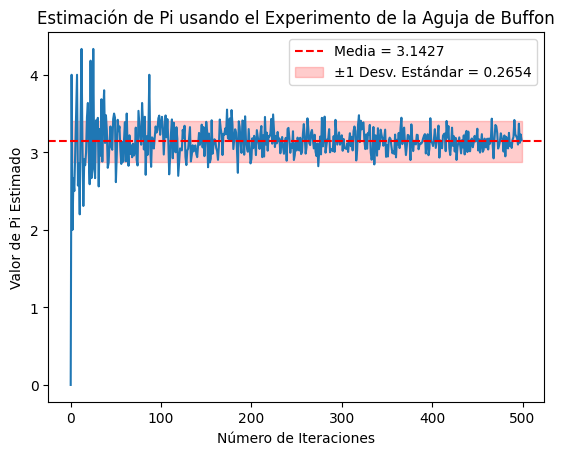

Media = 3.142724434294187
Desviación Estándar = 0.265424202929407


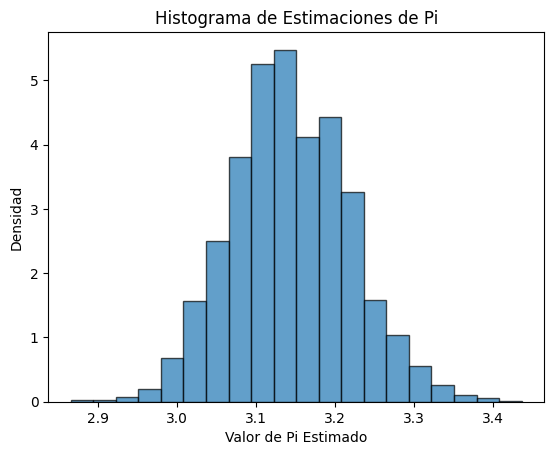

In [60]:
import numpy as np
import random as rnd
import matplotlib.pyplot as plt
import scipy.stats as stats

def buffon_needle_experiment(N, L, D):
    crosses = 0
    for _ in range(N):
        # La distancia desde el centro de la aguja a la línea más cercana
        y = rnd.uniform(0, D/2)
        # El ángulo que forma la aguja con las líneas paralelas
        theta = rnd.uniform(0, np.pi/2)
        # Contar si la aguja cruza la línea
        if y <= (L / 2) * np.sin(theta):
            crosses += 1
    # Estimar pi usando la fórmula
    if crosses == 0:
        return 0  # Evitar división por cero
    pi_estimate = (2 * L * N) / (crosses * D)
    return pi_estimate

def estimacion(N, L, D):
    lis = []
    for i in range(1, N + 1):
        pi_estimate = buffon_needle_experiment(i, L, D)
        lis.append(pi_estimate)
    return lis

N = 500
L = 1  # Longitud de la aguja
D = 1  # Distancia entre las líneas
G = estimacion(N, L, D)
print("pi: ", G[-1])

# Graficar la estimación de Pi
plt.plot(G)

# Cálculo de la media y desviación estándar
media = np.mean(G)
desviacion_estandar = np.std(G)

# Graficar la media
plt.axhline(y=media, color='r', linestyle='--', label=f'Media = {media:.4f}')

# Graficar una banda de ±1 desviación estándar alrededor de la media
plt.fill_between(range(N), media - desviacion_estandar, media + desviacion_estandar, color='r', alpha=0.2, label=f'±1 Desv. Estándar = {desviacion_estandar:.4f}')

# Agregar etiquetas y leyenda
plt.xlabel('Número de Iteraciones')
plt.ylabel('Valor de Pi Estimado')
plt.title('Estimación de Pi usando el Experimento de la Aguja de Buffon')
plt.legend()
plt.show()

# Imprimir los valores de media y desviación estándar
print("Media =", media)
print("Desviación Estándar =", desviacion_estandar)

def simulacion(M, N, L, D):
    r = []
    for i in range(M):
        R = buffon_needle_experiment(N, L, D)
        r.append(R)  # Guardar solo el último valor de cada estimación
    return r

# Realizar 5000 simulaciones con 1000 iteraciones cada una
M = 5000
N = 1000
S = simulacion(M, N, L, D)

# Calcular la media y desviación estándar de las simulaciones
media_sim = np.mean(S)
desviacion_sim = np.std(S)

# Graficar el histograma de las simulaciones
plt.hist(S, bins=20, density=True, edgecolor='black', alpha=0.7)

# Agregar etiquetas y leyenda
plt.xlabel('Valor de Pi Estimado')
plt.ylabel('Densidad')
plt.title('Histograma de Estimaciones de Pi')
plt.show()
